<a href="https://colab.research.google.com/github/ProbablyBenjamin/COMP5512022/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# Variables to intilize 
#To ensure reproducibility


# import 
# shut down warnings because annoying

import warnings
warnings.filterwarnings("ignore")

# np.random.seed(11)

train_dataset = torchvision.datasets.FashionMNIST(root=".", train = True, transform = transforms.ToTensor(),download=True)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=30, shuffle=True, num_workers=0)

test_dataset = torchvision.datasets.FashionMNIST(root=".",train = False,transform = transforms.ToTensor(), download=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=30, shuffle=False, num_workers=0)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



## Visualizing Data

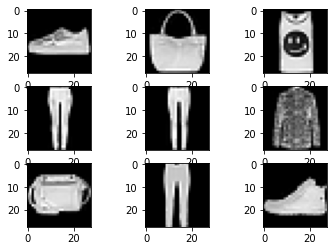

In [ ]:
for i in range(100,109):
	plt.subplot(330 + 1 + i%9)
	# plot raw pixel data
	plt.imshow(train_dataset.data[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
### defining the model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__() 
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3) 
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.fc1 = nn.Linear(128*24*24, 128)
        self.fc2 = nn.Linear(128, 128)
        self.output = nn.Linear(128, 10)
        
    def forward(self, x):
        # Using: (W - K) + 1 to calculate size after each convolution
        x = self.conv1(x) # (28, 28, 1) --> (26, 26, 64)
        x = F.relu(x)
        x = self.conv2(x) # (26, 26, 64) --> (24, 24, 128)
        x = F.relu(x)
        x = x.view(-1, 128*24*24) # Flatten
        x = self.fc1(x)
        x = F.relu(x)
        x = self.output(x) #----> 10
        x = F.softmax(x)
        return x

In [ ]:
model = CNN() 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

CNN(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=73728, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
def test_accuracy():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

In [ ]:
## Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1,)

# Init statistics arrays
train_accuracy_epochs = []
test_accuracy_epochs = []
loss_epochs = []

epochs = 10
for epoch in range(epochs):
    total = 0
    running_loss = 0.0
    running_correct = 0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Initialize gradient params to zero
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        total += len(inputs)
        running_correct += (predicted == labels).sum().item()
        running_loss += loss.item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / total))
    train_accuracy_epochs.append(100 * running_correct / len(train_dataset))
    test_accuracy_epochs.append(test_accuracy())
    loss_epochs.append(running_loss)

print('Finished Training')
    
x = list(range(1, epochs + 1)) 
plt.title("CNN Epoch Percentage")
plt.xlabel("Epoch")
plt.ylabel("Percentage Correct %")
plt.plot(x, loss_epochs, color='red', label='loss')
plt.plot(x, train_accuracy_epochs, color='blue', label='training accuracy')
plt.plot(x, test_accuracy_epochs, color='green', label='test accuracy')
plt.legend()
plt.show()

[1,   250] loss: 0.056
[1,   500] loss: 0.056
[1,   750] loss: 0.056
[1,  1000] loss: 0.056
[1,  1250] loss: 0.056
[1,  1500] loss: 0.056
[1,  1750] loss: 0.056
[1,  2000] loss: 0.056
[2,   250] loss: 0.056
[2,   500] loss: 0.056
[2,   750] loss: 0.056
[2,  1000] loss: 0.056
[2,  1250] loss: 0.056


Finished Training


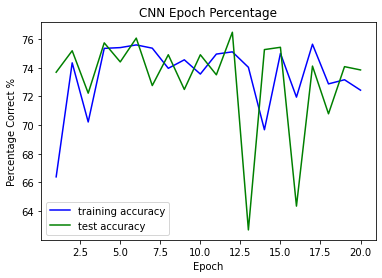

accuracy is  73.85


In [ ]:
print('Finished Training')
    
x = list(range(1, epochs + 1)) 
plt.title("CNN Epoch Percentage")
plt.xlabel("Epoch")
plt.ylabel("Percentage Correct %")
plt.plot(x, train_accuracy_epochs, color='blue', label='training accuracy')
plt.plot(x, test_accuracy_epochs, color='green', label='test accuracy')
plt.legend()
plt.show()
print("accuracy is ", test_accuracy())

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b6e80ea5-0043-4792-ac27-a4b47a049a2d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>